In [1]:
import pandas as pd

meta = pd.read_csv('IBD_vs_healthy_samples.csv', index_col='Run')

df = pd.read_csv('Reaction_abundance_IBD_vs_healthy.csv', index_col='Var1')
df = df.T

df = df.merge(meta['Health state'], left_index=True, right_index=True)
df

10DMMCNFDOR  12DGR180t  12DGR180tex  12DGR180ti  12DGR180tipp  \
ERR209055          0.0        0.0     0.007111    0.035633      0.007111   
ERR209056          0.0        0.0     0.006728    0.034856      0.006728   
ERR209057          0.0        0.0     0.005487    0.089555      0.005487   
ERR209058          0.0        0.0     0.004651    0.087438      0.004651   
ERR209059          0.0        0.0     0.004890    0.092380      0.004890   
...                ...        ...          ...         ...           ...   
ERR209902          0.0        0.0     0.018076    0.050674      0.018076   
ERR209903          0.0        0.0     0.003029    0.054377      0.003029   
ERR209904          0.0        0.0     0.003245    0.058464      0.003245   
ERR209905          0.0        0.0     0.000000    0.049837      0.000000   
ERR209906          0.0        0.0     0.000000    0.046860      0.000000   

           12PPDSDH  12PPD_Stex    12PPDt  12PPDtpp  12aHSDHe  ...  tICHORpp  \
ERR209055  0.003869    0.027069  0.002687  0.027069  0.017345  ...       0.0   
ERR209056  0.003905    0.027974  0.002686  0.027974  0.018527  ...       0.0   
ERR209057  0.014141    0.006167  0.002194  0.006167  0.017452  ...       0.0   
ERR209058  0.017380    0.007661  0.002685  0.007661  0.018267  ...       0.0   
ERR209059  0.015525    0.007781  0.002533  0.007781  0.018721  ...       0.0   
...             ...         ...       ...       ...       ...  ...       ...   
ERR209902  0.024830    0.044885  0.011113  0.044885  0.023526  ...       0.0   
ERR209903  0.019182    0.022929  0.009907  0.022929  0.028169  ...       0.0   
ERR209904  0.022095    0.023352  0.012868  0.023352  0.024959  ...       0.0   
ERR209905  0.019325    0.015045  0.002980  0.015045  0.018048  ...       0.0   
ERR209906  0.022504    0.012464  0.006230  0.012464  0.015149  ...       0.0   

              tNCAP   tNCAPpp      tNZP    tNZPpp  tSBZCOA  tSBZCOApp  tSUCBZ  \
ERR209055  0.038025  0.057569  0.038025  0.057569      0.0   0.005964     0.0   
ERR209056  0.039237  0.057994  0.039237  0.057994      0.0   0.005541     0.0   
ERR209057  0.039296  0.048284  0.039296  0.048284      0.0   0.004481     0.0   
ERR209058  0.035729  0.044644  0.035729  0.044644      0.0   0.003202     0.0   
ERR209059  0.035817  0.047011  0.035817  0.047011      0.0   0.003644     0.0   
...             ...       ...       ...       ...      ...        ...     ...   
ERR209902  0.046127  0.117220  0.046127  0.117220      0.0   0.015298     0.0   
ERR209903  0.043639  0.045771  0.043639  0.045771      0.0   0.000000     0.0   
ERR209904  0.037920  0.044890  0.037920  0.044890      0.0   0.000000     0.0   
ERR209905  0.033703  0.034832  0.033703  0.034832      0.0   0.000000     0.0   
ERR209906  0.030751  0.024606  0.030751  0.024606      0.0   0.000000     0.0   

           tSUCBZpp  Health state  
ERR209055  0.000000       Healthy  
ERR209056  0.000000       Healthy  
ERR209057  0.000000       Healthy  
ERR209058  0.000000       Healthy  
ERR209059  0.000000       Healthy  
...             ...           ...  
ERR209902  0.004307       Healthy  
ERR209903  0.002697       Healthy  
ERR209904  0.001875       Healthy  
ERR209905  0.001296       Healthy  
ERR209906  0.000000       Healthy  

[735 rows x 8145 columns]

In [2]:
df['Health state'].value_counts()

Diseased    472
Healthy     263
Name: Health state, dtype: int64

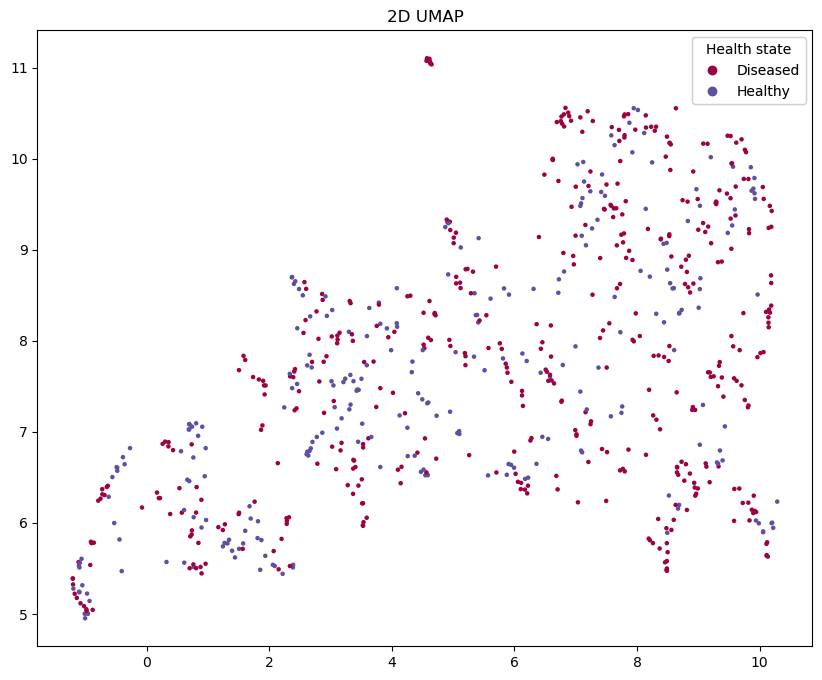

In [3]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_2d_umap(data, label_col):
    # Split data into features and labels
    features = data.drop(label_col, axis=1)
    labels = data[label_col]

    # Convert categorical labels to integers
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)

    # Compute UMAP embeddings
    reducer = umap.UMAP(random_state=42)
    embeddings = reducer.fit_transform(features)

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels_encoded, cmap='Spectral', s=5)
    
    # Produce a legend with the unique colors from the scatter
    legend_handles, legend_labels = scatter.legend_elements()
    mapped_labels = [le.classes_[i] for i, label in enumerate(legend_labels)]
    legend1 = plt.legend(handles=legend_handles, title=label_col, loc='upper right', labels=mapped_labels)
    plt.gca().add_artist(legend1)

    plt.title('2D UMAP')
    plt.show()
    
plot_2d_umap(df, 'Health state')

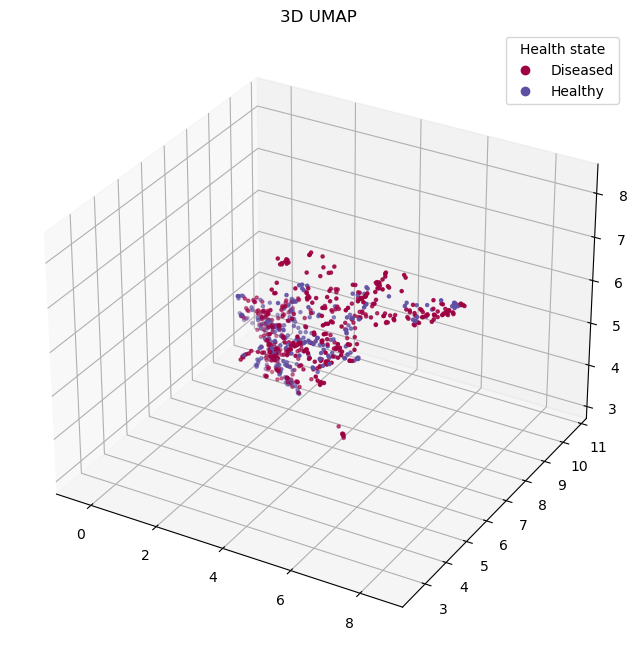

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_umap(data, label_col):
    # Split data into features and labels
    features = data.drop(label_col, axis=1)
    labels = data[label_col]

    # Convert categorical labels to integers
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)

    # Compute UMAP embeddings for 3D
    reducer = umap.UMAP(n_components=3, random_state=42)
    embeddings = reducer.fit_transform(features)

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=labels_encoded, cmap='Spectral', s=5)

    # Produce a legend with the unique colors from the scatter
    legend_handles, legend_labels = scatter.legend_elements()
    mapped_labels = [le.classes_[i] for i, label in enumerate(legend_labels)]
    ax.legend(handles=legend_handles, title=label_col, loc='upper right', labels=mapped_labels)

    ax.set_title('3D UMAP')
    plt.show()

plot_3d_umap(df, 'Health state')

In [5]:
import plotly.express as px

def plot_3d_umap_interactive(data, label_col):
    # Split data into features and labels
    features = data.drop(label_col, axis=1)
    labels = data[label_col]

    # Convert categorical labels to integers
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)

    # Compute UMAP embeddings for 3D
    reducer = umap.UMAP(n_components=3, random_state=42)
    embeddings = reducer.fit_transform(features)

    # Convert embeddings and labels to DataFrame
    df_embeddings = pd.DataFrame(embeddings, columns=['x', 'y', 'z'])
    df_embeddings[label_col] = labels

    # Create an interactive 3D scatter plot using plotly
    fig = px.scatter_3d(df_embeddings, x='x', y='y', z='z', size_max=3, color=labels_encoded, color_discrete_sequence=px.colors.qualitative.Set1)
    fig.update_layout(title='3D UMAP')
    fig.show()
    
plot_3d_umap_interactive(df, 'Health state')

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load your data
data_path = 'Reaction_abundance_IBD_vs_healthy.csv'
data = pd.read_csv(data_path).set_index('Var1').transpose()

# 1. Check for NaN or Infinite Values
nan_values = data.isna().sum().sum()
infinite_values = (data == np.inf).sum().sum() + (data == -np.inf).sum().sum()
print(f"NaN values: {nan_values}, Infinite values: {infinite_values}")

# 2. Check Value Ranges
min_value = data.min().min()
max_value = data.max().max()
print(f"Min value: {min_value}, Max value: {max_value}")

# 3. Check Data Types
data_types = data.dtypes.unique()
print(f"Data types in the dataset: {data_types}")

NaN values: 0, Infinite values: 0
Min value: 0.0, Max value: 0.8554
Data types in the dataset: [dtype('float64')]


In [7]:
data_path = 'Reaction_abundance_IBD_vs_healthy.csv'
data = pd.read_csv(data_path).set_index('Var1').transpose()
data.columns

Index(['10DMMCNFDOR', '12DGR180t', '12DGR180tex', '12DGR180ti', '12DGR180tipp',
       '12PPDSDH', '12PPD_Stex', '12PPDt', '12PPDtpp', '12aHSDHe',
       ...
       'tICHOR', 'tICHORpp', 'tNCAP', 'tNCAPpp', 'tNZP', 'tNZPpp', 'tSBZCOA',
       'tSBZCOApp', 'tSUCBZ', 'tSUCBZpp'],
      dtype='object', name='Var1', length=8144)

In [8]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 1. Data Loading and Preprocessing
data_path = 'Reaction_abundance_IBD_vs_healthy.csv'
data = pd.read_csv(data_path).set_index('Var1').transpose()

# Normalizing the data
x_train = (data - data.min()) / (data.max() - data.min())

# Column-wise imputation
x_train_imputed = x_train.fillna(x_train.mean())

# Drop columns with all NaN values
x_train_cleaned = x_train_imputed.dropna(axis=1, how='all')

columns = x_train_cleaned[x_train_cleaned.isna().any(axis=1)].columns

x_train = torch.tensor(x_train_cleaned.values, dtype=torch.float32)

# 2. Check if GPU with CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 3. VAE Model Definition
class VAE(nn.Module):
    def __init__(self, input_dim, intermediate_dim, latent_dim):
        super(VAE, self).__init__()
        
        # Encoder
        self.fc1 = nn.Linear(input_dim, intermediate_dim)
        self.fc2_mean = nn.Linear(intermediate_dim, latent_dim)
        self.fc2_logvar = nn.Linear(intermediate_dim, latent_dim)
        
        # Decoder
        self.fc3 = nn.Linear(latent_dim, intermediate_dim)
        self.fc4 = nn.Linear(intermediate_dim, input_dim)
        
    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc2_mean(h), self.fc2_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))  
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Hyperparameters
input_dim = x_train.shape[1]
intermediate_dim = 512
latent_dim = 64
batch_size = 128
epochs = 50

# Initialize model and optimizer
model = VAE(input_dim, intermediate_dim, latent_dim).to(device)
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)

# DataLoader
dataloader = DataLoader(TensorDataset(x_train), batch_size=batch_size, shuffle=True)

# 4. Training Loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data,) in enumerate(dataloader):
        data = data.to(device)
        optimizer.zero_grad()  
        recon_batch, mu, logvar = model(data)
        loss = vae_loss(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss / len(dataloader.dataset)}")

# 5. Data Generation
with torch.no_grad():
    z = torch.randn(len(x_train), latent_dim).to(device)
    synthetic_data = model.decode(z).cpu().numpy()

synthetic_data_df = pd.DataFrame(synthetic_data, columns=columns)

# Save the synthetic data
synthetic_data_df#.to_csv('synthetic_data.csv', index=False)

Using device: cuda
Epoch 1/50, Loss: 4862.064668367347
Epoch 2/50, Loss: 4716.753358843537
Epoch 3/50, Loss: 4517.663222789116
Epoch 4/50, Loss: 4255.680824829932
Epoch 5/50, Loss: 3994.819345238095
Epoch 6/50, Loss: 3768.0388605442176
Epoch 7/50, Loss: 3583.3415391156464
Epoch 8/50, Loss: 3452.021471088435
Epoch 9/50, Loss: 3367.1257227891156
Epoch 10/50, Loss: 3319.64162414966
Epoch 11/50, Loss: 3291.318707482993
Epoch 12/50, Loss: 3266.6129676870746
Epoch 13/50, Loss: 3248.757738095238
Epoch 14/50, Loss: 3231.9361394557823
Epoch 15/50, Loss: 3217.3209608843536
Epoch 16/50, Loss: 3205.6491496598637
Epoch 17/50, Loss: 3193.8578656462587
Epoch 18/50, Loss: 3183.582610544218
Epoch 19/50, Loss: 3173.6113095238097
Epoch 20/50, Loss: 3163.666113945578
Epoch 21/50, Loss: 3155.396471088435
Epoch 22/50, Loss: 3146.550382653061
Epoch 23/50, Loss: 3137.8914540816327
Epoch 24/50, Loss: 3131.49162414966
Epoch 25/50, Loss: 3126.0838010204084
Epoch 26/50, Loss: 3118.7427721088434
Epoch 27/50, Loss:

Var1  12DGR180t  12DGR180tex  12DGR180ti  12DGR180tipp  12PPDSDH  12PPD_Stex  \
0      0.215166     0.394889    0.432728      0.352883  0.322978    0.410821   
1      0.093583     0.313772    0.419290      0.284219  0.243066    0.335067   
2      0.221055     0.327546    0.427763      0.375303  0.414941    0.447454   
3      0.267119     0.414827    0.438782      0.480171  0.428805    0.433707   
4      0.249315     0.289427    0.487886      0.417654  0.386988    0.356630   
..          ...          ...         ...           ...       ...         ...   
730    0.121395     0.392271    0.409786      0.356685  0.318782    0.511574   
731    0.182185     0.324319    0.397051      0.300966  0.330321    0.387928   
732    0.242482     0.309370    0.457136      0.296758  0.329804    0.341807   
733    0.198971     0.379926    0.411097      0.360898  0.412201    0.463632   
734    0.140258     0.389448    0.361426      0.328649  0.321338    0.397531   

Var1    12PPDt  12PPDtpp  12aHSDHe    13PPDH  ...    tCZPpp     tDHNA  \
0     0.332396  0.459961  0.402307  0.216038  ...  0.376052  0.374706   
1     0.329005  0.380541  0.375860  0.191949  ...  0.327358  0.250161   
2     0.379065  0.433185  0.460474  0.235984  ...  0.385166  0.370601   
3     0.379846  0.456955  0.434415  0.368219  ...  0.451850  0.348625   
4     0.273955  0.444232  0.508593  0.264561  ...  0.449430  0.376490   
..         ...       ...       ...       ...  ...       ...       ...   
730   0.327618  0.412682  0.370920  0.158663  ...  0.364207  0.256020   
731   0.460579  0.379663  0.340629  0.313455  ...  0.343670  0.321419   
732   0.365735  0.385608  0.414877  0.198453  ...  0.419329  0.329945   
733   0.307793  0.440337  0.392092  0.228731  ...  0.382081  0.344369   
734   0.323568  0.490564  0.399403  0.180930  ...  0.404752  0.316946   

Var1   tDHNApp     tNCAP   tNCAPpp      tNZP    tNZPpp   tSBZCOA  tSBZCOApp  \
0     0.233863  0.451561  0.438278  0.384611  0.464757  0.183804   0.323157   
1     0.154874  0.377227  0.400783  0.349331  0.315791  0.150389   0.270438   
2     0.280986  0.456177  0.470186  0.449134  0.389364  0.275647   0.353805   
3     0.357857  0.375027  0.419002  0.365592  0.445806  0.293703   0.386789   
4     0.241363  0.536926  0.379773  0.509986  0.449818  0.166280   0.311523   
..         ...       ...       ...       ...       ...       ...        ...   
730   0.227512  0.456928  0.383625  0.413813  0.344383  0.138197   0.279940   
731   0.230985  0.492815  0.423614  0.423993  0.378220  0.218553   0.353571   
732   0.196755  0.371301  0.416482  0.398777  0.375748  0.182482   0.258127   
733   0.297192  0.488632  0.498759  0.510071  0.370823  0.155453   0.366830   
734   0.267381  0.443387  0.448380  0.445189  0.400219  0.199482   0.349509   

Var1  tSUCBZpp  
0     0.300902  
1     0.255125  
2     0.395670  
3     0.389646  
4     0.353463  
..         ...  
730   0.280439  
731   0.428421  
732   0.327020  
733   0.374264  
734   0.326339  

[735 rows x 7027 columns]

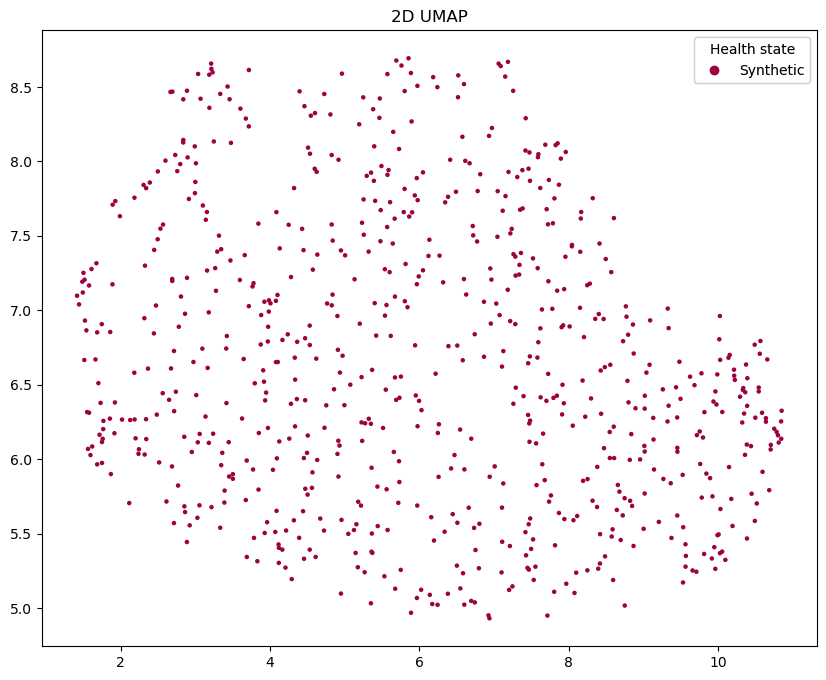

In [9]:
synthetic_data_df['Health state'] = 'Synthetic'
plot_2d_umap(synthetic_data_df, 'Health state')

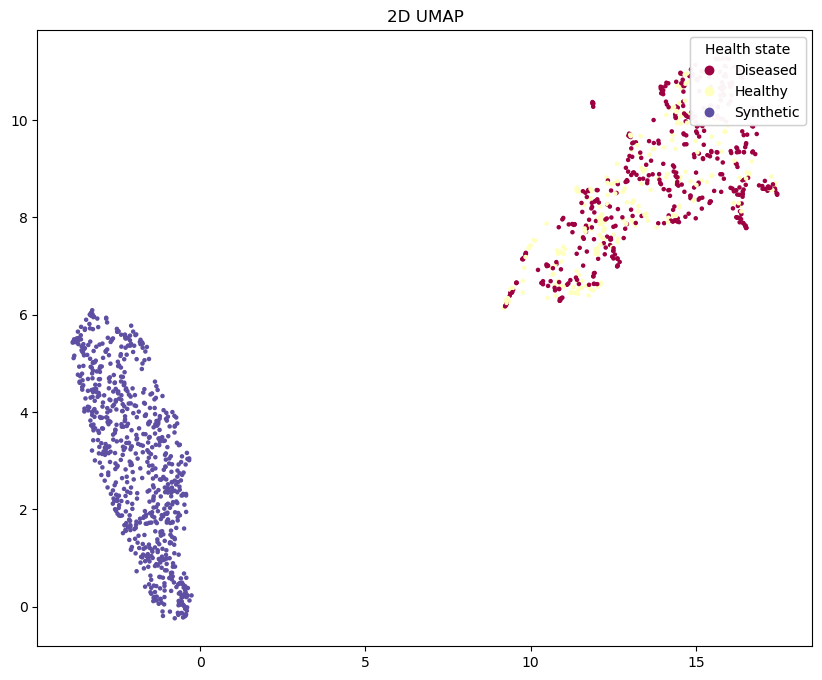

In [10]:
frames = [df[synthetic_data_df.columns], synthetic_data_df]
combined_df = pd.concat(frames)

plot_2d_umap(combined_df, 'Health state')

In [12]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

# 1. Data Loading and Preprocessing
data_path = 'Reaction_abundance_IBD_vs_healthy.csv'
data = pd.read_csv(data_path).set_index('Var1').transpose()

# Normalizing the data
x_train = (data - data.min()) / (data.max() - data.min())

# Column-wise imputation
x_train_imputed = x_train.fillna(x_train.mean())

# Drop columns with all NaN values
x_train_cleaned = x_train_imputed.dropna(axis=1, how='all')

columns = x_train_cleaned[x_train_cleaned.isna().any(axis=1)].columns

x_train = torch.tensor(x_train_cleaned.values, dtype=torch.float32)

# 2. Check if GPU with CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Generator Network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, output_dim),
            nn.Tanh()  # Ensure the output is between [-1, 1]
        )
    
    def forward(self, z):
        return self.model(z)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1),
            # nn.Sigmoid()  # Get a probability as output
        )
    
    def forward(self, data):
        return self.model(data)

# Define the input and output dimensions for the Generator
latent_dim = 100
data_dim = x_train_cleaned.shape[1]  # Replace with the shape of your cleaned dataset

# Initialize the networks
generator = Generator(latent_dim, data_dim)
discriminator = Discriminator(data_dim)

Using device: cuda


In [13]:
import torch.optim as optim

# Hyperparameters
lr = 0.0002
batch_size = 64
epochs = 3000
sample_interval = 1000  # Save generated data every 'sample_interval' epochs

# Loss and Optimizers
adversarial_loss = torch.nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# DataLoader (assuming x_train_cleaned is your cleaned dataset)
tensor_dataset = torch.tensor(x_train_cleaned.values, dtype=torch.float32)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Move models to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

# Training hyperparameters
clip_value = 0.01
discriminator_updates = 5

# Training Loop
for epoch in range(epochs):
    
    for i, real_data in enumerate(dataloader):
        
        # ---------------------
        #  Train Discriminator
        # ---------------------
        
        # Train the discriminator for 'discriminator_updates' times as per WGAN guidelines
        for _ in range(discriminator_updates):
            optimizer_D.zero_grad()

            # Real data
            real_data = real_data.to(device)
            real_pred = discriminator(real_data)
            
            # Generate fake data
            z = torch.randn((real_data.size(0), latent_dim)).to(device)
            fake_data = generator(z)
            
            # Fake data
            fake_pred = discriminator(fake_data.detach())
            
            # Wasserstein discriminator loss
            d_loss = -torch.mean(real_pred) + torch.mean(fake_pred)
            
            d_loss.backward()
            optimizer_D.step()
            
            # Clip discriminator weights
            for p in discriminator.parameters():
                p.data.clamp_(-clip_value, clip_value)
        
        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()
        
        # Generate a batch of fake data
        z = torch.randn((real_data.size(0), latent_dim)).to(device)
        fake_data = generator(z)
        
        # Loss for the generator
        fake_pred = discriminator(fake_data)
        g_loss = -torch.mean(fake_pred)
        
        g_loss.backward()
        optimizer_G.step()

    # Print the losses
    print(f"[Epoch {epoch}/{epochs}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")
    
#     for i, real_data in enumerate(dataloader):
        
#         # Adversarial ground truths
#         valid = torch.ones((real_data.size(0), 1)).to(device)
#         fake = torch.zeros((real_data.size(0), 1)).to(device)

#         # ---------------------
#         #  Train Discriminator
#         # ---------------------
#         optimizer_D.zero_grad()
        
#         # Real data
#         real_data = real_data.to(device)
#         real_pred = discriminator(real_data)
#         d_real_loss = adversarial_loss(real_pred, valid)
        
#         # Generate fake data
#         z = torch.randn((real_data.size(0), latent_dim)).to(device)
#         fake_data = generator(z)
        
#         # Fake data
#         fake_pred = discriminator(fake_data.detach())  # .detach() to avoid training the generator here
#         d_fake_loss = adversarial_loss(fake_pred, fake)
        
#         # Total discriminator loss
#         d_loss = (d_real_loss + d_fake_loss) / 2
#         d_loss.backward()
#         optimizer_D.step()

#         # -----------------
#         #  Train Generator
#         # -----------------
#         optimizer_G.zero_grad()
        
#         # Generate a batch of fake data
#         z = torch.randn((real_data.size(0), latent_dim)).to(device)
#         fake_data = generator(z)
        
#         # Loss for the generator
#         fake_pred = discriminator(fake_data)
#         g_loss = adversarial_loss(fake_pred, valid)
        
#         g_loss.backward()
#         optimizer_G.step()

#     # Print the losses
#     print(f"[Epoch {epoch}/{epochs}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")
    
    # Save generated data at sample intervals
    if epoch % sample_interval == 0:
        z = torch.randn((batch_size, latent_dim)).to(device)
        generated_data = generator(z)
        # Here you can save the generated_data or do something else with it

[Epoch 0/3000] [D loss: -6.4499] [G loss: -3.7025]
[Epoch 1/3000] [D loss: -1.5737] [G loss: -0.6200]
[Epoch 2/3000] [D loss: -3.2940] [G loss: 1.6735]
[Epoch 3/3000] [D loss: -4.8080] [G loss: 4.5497]
[Epoch 4/3000] [D loss: -1.8152] [G loss: -0.7055]
[Epoch 5/3000] [D loss: -1.5092] [G loss: -0.5373]
[Epoch 6/3000] [D loss: 0.1659] [G loss: -2.7108]
[Epoch 7/3000] [D loss: -1.3853] [G loss: 1.2860]
[Epoch 8/3000] [D loss: -0.2343] [G loss: 0.8169]
[Epoch 9/3000] [D loss: 0.1829] [G loss: -2.2661]
[Epoch 10/3000] [D loss: -0.2756] [G loss: 0.2924]
[Epoch 11/3000] [D loss: 0.0946] [G loss: 1.9734]
[Epoch 12/3000] [D loss: -0.5809] [G loss: -0.2972]
[Epoch 13/3000] [D loss: -0.5099] [G loss: -0.7241]
[Epoch 14/3000] [D loss: -0.8031] [G loss: -0.2431]
[Epoch 15/3000] [D loss: -0.6146] [G loss: 1.0599]
[Epoch 16/3000] [D loss: -0.8142] [G loss: -1.4705]
[Epoch 17/3000] [D loss: -0.7504] [G loss: 2.3047]
[Epoch 18/3000] [D loss: -0.7844] [G loss: -0.9497]
[Epoch 19/3000] [D loss: -1.3857]

KeyboardInterrupt: 

In [6]:
# Noisy 
import torch.optim as optim

# Hyperparameters
lr = 0.0002
batch_size = 64
epochs = 500
sample_interval = 1000  # Save generated data every 'sample_interval' epochs

# Loss and Optimizers
adversarial_loss = torch.nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# DataLoader (assuming x_train_cleaned is your cleaned dataset)
tensor_dataset = torch.tensor(x_train_cleaned.values, dtype=torch.float32)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Move models to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

def add_noise(data, std_dev=0.1):
    '''Adds Gaussian noise to the data'''
    return data + std_dev * torch.randn_like(data)

# Training Loop
for epoch in range(epochs):
    
#     for i, real_data in enumerate(dataloader):
        
#         # Adversarial ground truths
#         valid = torch.ones((real_data.size(0), 1)).to(device)
#         fake = torch.zeros((real_data.size(0), 1)).to(device)

#         # ---------------------
#         #  Train Discriminator
#         # ---------------------
#         optimizer_D.zero_grad()
        
#         # Real data with noise
#         real_data = real_data.to(device)
#         noisy_real_data = add_noise(real_data)
#         real_pred = discriminator(noisy_real_data)
#         d_real_loss = adversarial_loss(real_pred, valid)
        
#         # Generate fake data and add noise
#         z = torch.randn((real_data.size(0), latent_dim)).to(device)
#         fake_data = generator(z)
#         noisy_fake_data = add_noise(fake_data)
        
#         # Fake data
#         fake_pred = discriminator(noisy_fake_data.detach())  # .detach() to avoid training the generator here
#         d_fake_loss = adversarial_loss(fake_pred, fake)
        
#         # Total discriminator loss
#         d_loss = (d_real_loss + d_fake_loss) / 2
#         d_loss.backward()
#         optimizer_D.step()

#         # -----------------
#         #  Train Generator
#         # -----------------
#         optimizer_G.zero_grad()
        
#         # Generate a batch of fake data
#         z = torch.randn((real_data.size(0), latent_dim)).to(device)
#         fake_data = generator(z)
        
#         # Loss for the generator
#         fake_pred = discriminator(fake_data)
#         g_loss = adversarial_loss(fake_pred, valid)
        
#         g_loss.backward()
#         optimizer_G.step()

#     # Print the losses
#     print(f"[Epoch {epoch}/{epochs}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")
    
    # Save generated data at sample intervals
    if epoch % sample_interval == 0:
        z = torch.randn((batch_size, latent_dim)).to(device)
        generated_data = generator(z)

[Epoch 0/500] [D loss: 0.4320] [G loss: 0.6590]
[Epoch 1/500] [D loss: 0.4889] [G loss: 0.6867]
[Epoch 2/500] [D loss: 0.4550] [G loss: 0.6563]
[Epoch 3/500] [D loss: 0.4764] [G loss: 0.7786]
[Epoch 4/500] [D loss: 0.5092] [G loss: 0.3800]
[Epoch 5/500] [D loss: 0.6015] [G loss: 0.7096]
[Epoch 6/500] [D loss: 0.6306] [G loss: 0.7874]
[Epoch 7/500] [D loss: 0.4490] [G loss: 0.9854]
[Epoch 8/500] [D loss: 0.4619] [G loss: 0.7894]
[Epoch 9/500] [D loss: 0.4643] [G loss: 0.9057]
[Epoch 10/500] [D loss: 0.4724] [G loss: 0.9187]
[Epoch 11/500] [D loss: 0.5884] [G loss: 0.7251]
[Epoch 12/500] [D loss: 0.7327] [G loss: 0.5457]
[Epoch 13/500] [D loss: 0.7450] [G loss: 0.5180]
[Epoch 14/500] [D loss: 0.6367] [G loss: 0.9968]
[Epoch 15/500] [D loss: 0.5041] [G loss: 1.0991]


KeyboardInterrupt: 

[Epoch 0/500] [D loss: -0.5051] [G loss: -1.4364]


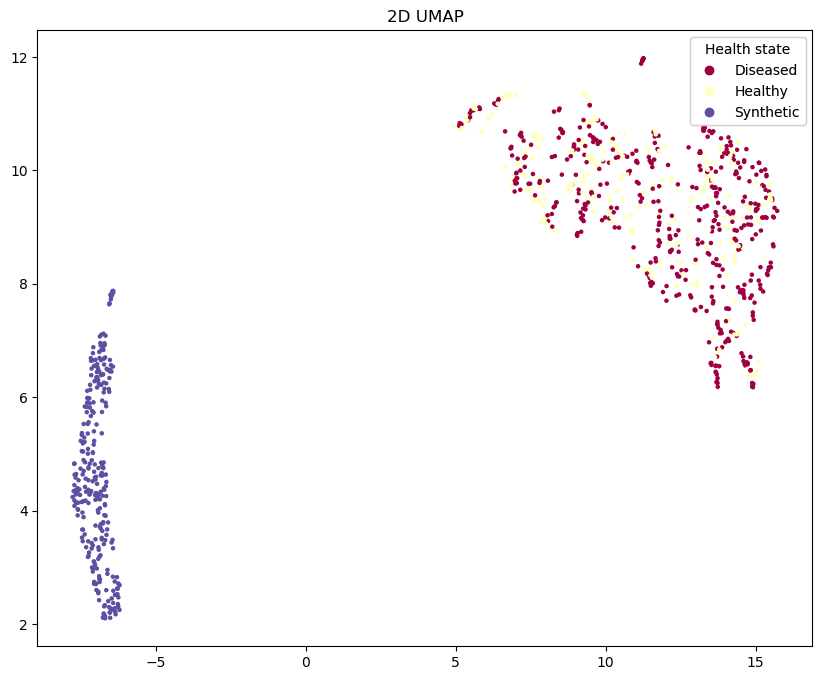

[Epoch 1/500] [D loss: -0.6313] [G loss: -1.3740]
[Epoch 2/500] [D loss: -0.6138] [G loss: 1.9449]
[Epoch 3/500] [D loss: -0.7831] [G loss: 2.3479]
[Epoch 4/500] [D loss: -0.5702] [G loss: 0.0535]
[Epoch 5/500] [D loss: -0.9249] [G loss: -3.2283]
[Epoch 6/500] [D loss: -0.6975] [G loss: -2.7457]
[Epoch 7/500] [D loss: -0.2662] [G loss: 0.6843]
[Epoch 8/500] [D loss: -0.8891] [G loss: 6.3612]
[Epoch 9/500] [D loss: -2.0634] [G loss: 6.2281]
[Epoch 10/500] [D loss: -1.6396] [G loss: -5.5406]
[Epoch 11/500] [D loss: 0.7375] [G loss: 3.9196]
[Epoch 12/500] [D loss: 1.0182] [G loss: -2.3533]
[Epoch 13/500] [D loss: -3.3122] [G loss: 10.3120]
[Epoch 14/500] [D loss: -0.4598] [G loss: -0.7674]
[Epoch 15/500] [D loss: -0.2411] [G loss: 0.6052]
[Epoch 16/500] [D loss: 0.2509] [G loss: 0.3953]
[Epoch 17/500] [D loss: -5.3959] [G loss: -9.8298]
[Epoch 18/500] [D loss: -0.0897] [G loss: 0.2580]
[Epoch 19/500] [D loss: 1.2023] [G loss: 1.7746]
[Epoch 20/500] [D loss: -0.0732] [G loss: 0.0702]
[Epoc

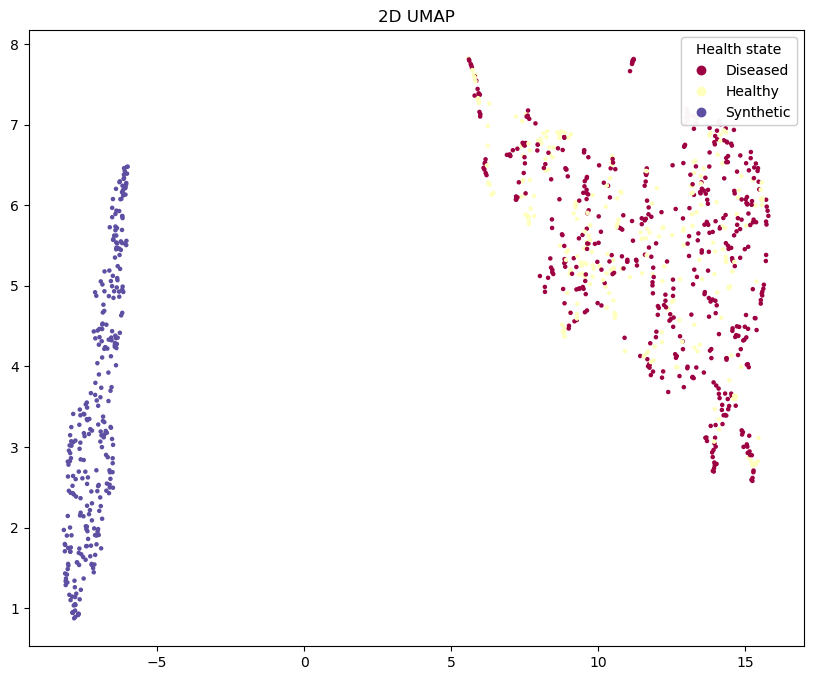

[Epoch 101/500] [D loss: 0.4562] [G loss: 1.5873]
[Epoch 102/500] [D loss: -0.4107] [G loss: -1.3269]
[Epoch 103/500] [D loss: 0.1881] [G loss: -1.1842]
[Epoch 104/500] [D loss: -0.9988] [G loss: 13.8147]
[Epoch 105/500] [D loss: -0.7978] [G loss: -1.8473]
[Epoch 106/500] [D loss: 0.3722] [G loss: -1.1096]
[Epoch 107/500] [D loss: -0.7709] [G loss: 3.4169]
[Epoch 108/500] [D loss: 0.0851] [G loss: 0.2545]
[Epoch 109/500] [D loss: -0.4053] [G loss: -3.0794]
[Epoch 110/500] [D loss: 0.0194] [G loss: -0.0551]
[Epoch 111/500] [D loss: 0.3542] [G loss: 3.3266]
[Epoch 112/500] [D loss: -0.1597] [G loss: -0.4181]
[Epoch 113/500] [D loss: 0.3080] [G loss: -2.3426]
[Epoch 114/500] [D loss: -1.0854] [G loss: 4.5569]
[Epoch 115/500] [D loss: 0.0610] [G loss: 0.0907]
[Epoch 116/500] [D loss: -0.3529] [G loss: -5.2314]
[Epoch 117/500] [D loss: -0.5506] [G loss: 1.9672]
[Epoch 118/500] [D loss: 0.2473] [G loss: 0.4947]
[Epoch 119/500] [D loss: -0.4050] [G loss: -2.4112]
[Epoch 120/500] [D loss: 0.09

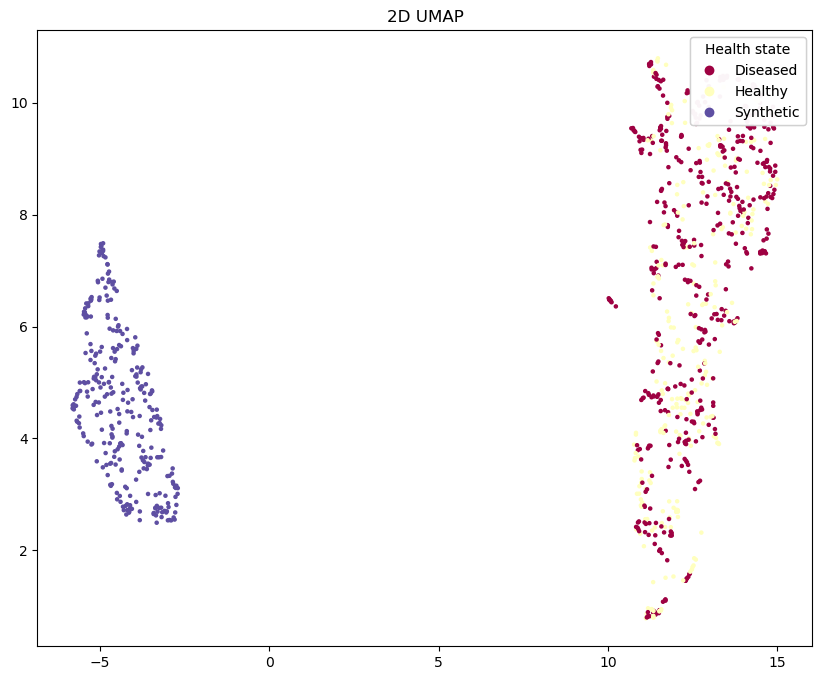

[Epoch 201/500] [D loss: -0.0054] [G loss: 0.4300]
[Epoch 202/500] [D loss: -0.6651] [G loss: -6.1479]
[Epoch 203/500] [D loss: 0.0155] [G loss: 3.4225]
[Epoch 204/500] [D loss: -0.5096] [G loss: -3.5213]
[Epoch 205/500] [D loss: -0.9455] [G loss: 8.7519]
[Epoch 206/500] [D loss: -0.1685] [G loss: -16.8403]
[Epoch 207/500] [D loss: 0.1800] [G loss: 0.2012]
[Epoch 208/500] [D loss: 1.9315] [G loss: -5.0672]
[Epoch 209/500] [D loss: 2.7495] [G loss: 6.9963]
[Epoch 210/500] [D loss: -2.8433] [G loss: -23.9951]
[Epoch 211/500] [D loss: -1.3691] [G loss: 3.3970]
[Epoch 212/500] [D loss: 0.0845] [G loss: 0.0907]
[Epoch 213/500] [D loss: -4.1775] [G loss: -22.6957]
[Epoch 214/500] [D loss: -0.0646] [G loss: 0.2323]
[Epoch 215/500] [D loss: 1.7354] [G loss: 19.9916]
[Epoch 216/500] [D loss: 0.0113] [G loss: 0.0175]
[Epoch 217/500] [D loss: -0.2477] [G loss: -0.5276]
[Epoch 218/500] [D loss: 2.9366] [G loss: -20.8572]
[Epoch 219/500] [D loss: -0.0294] [G loss: -0.0206]
[Epoch 220/500] [D loss: 

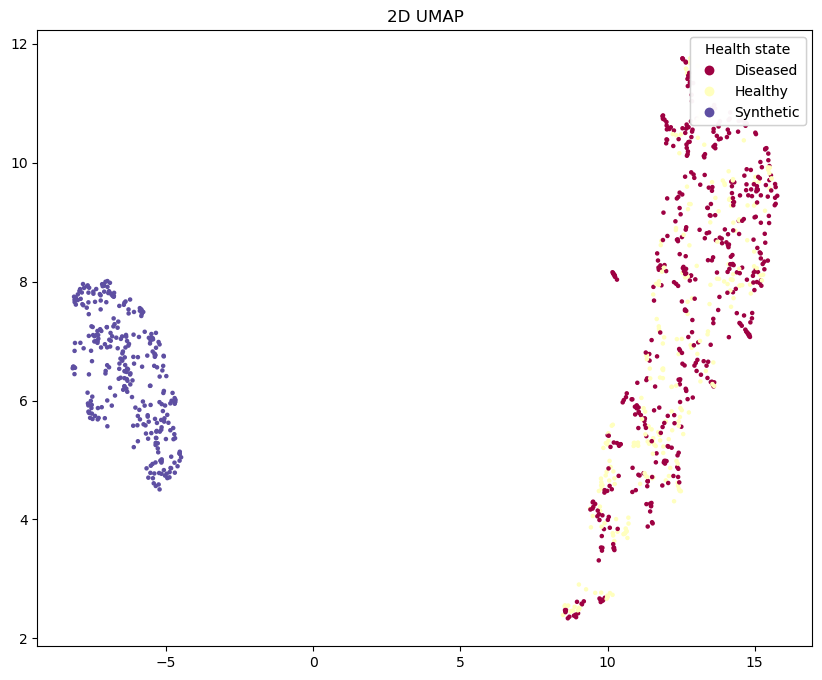

[Epoch 301/500] [D loss: -0.1159] [G loss: 0.2940]
[Epoch 302/500] [D loss: -0.0929] [G loss: -0.2594]
[Epoch 303/500] [D loss: -0.1041] [G loss: 0.0006]
[Epoch 304/500] [D loss: -0.1221] [G loss: -0.7020]
[Epoch 305/500] [D loss: -0.1115] [G loss: 0.2120]
[Epoch 306/500] [D loss: -0.1698] [G loss: -0.0896]
[Epoch 307/500] [D loss: -0.1718] [G loss: -0.3822]
[Epoch 308/500] [D loss: -0.1731] [G loss: 0.3903]
[Epoch 309/500] [D loss: -0.1641] [G loss: -0.6848]
[Epoch 310/500] [D loss: -0.1591] [G loss: 0.4483]
[Epoch 311/500] [D loss: -0.1613] [G loss: -0.6584]
[Epoch 312/500] [D loss: -0.1323] [G loss: 0.5995]
[Epoch 313/500] [D loss: -0.1492] [G loss: -0.1050]
[Epoch 314/500] [D loss: -0.1203] [G loss: -0.2555]
[Epoch 315/500] [D loss: -0.1609] [G loss: 0.3617]
[Epoch 316/500] [D loss: -0.1117] [G loss: -0.2491]
[Epoch 317/500] [D loss: -0.1339] [G loss: 0.1975]
[Epoch 318/500] [D loss: -0.0739] [G loss: -1.0005]
[Epoch 319/500] [D loss: -0.1801] [G loss: 1.2786]
[Epoch 320/500] [D lo

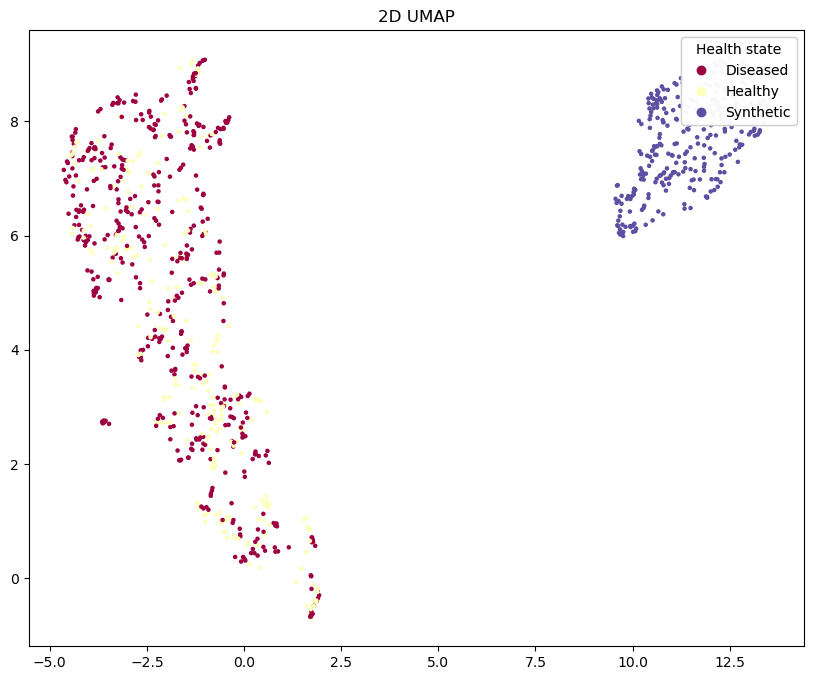

[Epoch 401/500] [D loss: 0.2912] [G loss: 2.2088]
[Epoch 402/500] [D loss: -0.2477] [G loss: -3.1395]
[Epoch 403/500] [D loss: -0.1417] [G loss: 4.3104]
[Epoch 404/500] [D loss: -0.1755] [G loss: -1.5523]
[Epoch 405/500] [D loss: 0.6247] [G loss: 13.9817]
[Epoch 406/500] [D loss: 1.3489] [G loss: -9.0639]
[Epoch 407/500] [D loss: -0.0600] [G loss: -0.1743]
[Epoch 408/500] [D loss: 0.0325] [G loss: -0.2415]
[Epoch 409/500] [D loss: 0.1163] [G loss: 10.5748]
[Epoch 410/500] [D loss: -1.4723] [G loss: -5.4911]
[Epoch 411/500] [D loss: -0.1842] [G loss: 0.8910]
[Epoch 412/500] [D loss: 0.7425] [G loss: 2.4003]
[Epoch 413/500] [D loss: -1.4274] [G loss: -4.2575]
[Epoch 414/500] [D loss: -0.0006] [G loss: 0.0292]
[Epoch 415/500] [D loss: -0.4533] [G loss: 10.1217]
[Epoch 416/500] [D loss: -0.0052] [G loss: -0.0514]
[Epoch 417/500] [D loss: 1.2884] [G loss: -5.9274]
[Epoch 418/500] [D loss: -1.6729] [G loss: 8.1256]
[Epoch 419/500] [D loss: 0.0045] [G loss: -0.0106]
[Epoch 420/500] [D loss: 0

In [14]:
# Noisy 
import torch.optim as optim

# Hyperparameters
lr = 0.0002
batch_size = 64
epochs = 500
sample_interval = 100  # Save generated data every 'sample_interval' epochs

# Loss and Optimizers
adversarial_loss = torch.nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# DataLoader (assuming x_train_cleaned is your cleaned dataset)
tensor_dataset = torch.tensor(x_train_cleaned.values, dtype=torch.float32)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Move models to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

# Define a function to generate synthetic data
def generate_synthetic_data(generator, num_samples, latent_dim, device):
    # Generate random noise
    z = torch.randn((num_samples, latent_dim)).to(device)
    
    # Generate synthetic data
    synthetic_data = generator(z)
    
    return synthetic_data.detach().cpu().numpy()

def add_noise(data, std_dev=0.1):
    '''Adds Gaussian noise to the data'''
    return data + std_dev * torch.randn_like(data)

def compute_gradient_penalty(D, real_samples, fake_samples, device):
    """Calculates the gradient penalty loss for WGAN GP"""
    # Random weight term for interpolation between real and fake samples
    alpha = torch.Tensor(np.random.random((real_samples.size(0), 1))).to(device)
    # Get random interpolation between real and fake samples
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True).to(device)
    d_interpolates = D(interpolates)
    fake = torch.Tensor(real_samples.shape[0], 1).fill_(1.0).to(device)
    # Get gradient w.r.t. interpolates
    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

lambda_gp = 10  # Gradient penalty lambda hyperparameter

# Training Loop
for epoch in range(epochs):
    
    for i, real_data in enumerate(dataloader):
        
        # ---------------------
        #  Train Discriminator
        # ---------------------
        
        # Train the discriminator for 'discriminator_updates' times as per WGAN guidelines
        for _ in range(discriminator_updates):
            optimizer_D.zero_grad()

            # Real data
            real_data = real_data.to(device)
            real_pred = discriminator(real_data)
            
            # Generate fake data
            z = torch.randn((real_data.size(0), latent_dim)).to(device)
            fake_data = generator(z)
            
            # Fake data
            fake_pred = discriminator(fake_data.detach())
            
            # Wasserstein discriminator loss
            d_loss = -torch.mean(real_pred) + torch.mean(fake_pred)
            
            d_loss.backward()
            optimizer_D.step()
            
            # Clip discriminator weights
            for p in discriminator.parameters():
                p.data.clamp_(-clip_value, clip_value)
        
        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()
        
        # Generate a batch of fake data
        z = torch.randn((real_data.size(0), latent_dim)).to(device)
        fake_data = generator(z)
        
        # Loss for the generator
        fake_pred = discriminator(fake_data)
        g_loss = -torch.mean(fake_pred)
        
        g_loss.backward()
        optimizer_G.step()

    # Print the losses
    print(f"[Epoch {epoch}/{epochs}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")
    
#     for i, real_data in enumerate(dataloader):
        
#         # Adversarial ground truths
#         valid = torch.ones((real_data.size(0), 1)).to(device)
#         fake = torch.zeros((real_data.size(0), 1)).to(device)

#         # ---------------------
#         #  Train Discriminator
#         # ---------------------
#         optimizer_D.zero_grad()
        
#         # Real data with noise
#         real_data = real_data.to(device)
#         noisy_real_data = add_noise(real_data)
#         real_pred = discriminator(noisy_real_data)
#         d_real_loss = adversarial_loss(real_pred, valid)
        
#         # Generate fake data and add noise
#         z = torch.randn((real_data.size(0), latent_dim)).to(device)
#         fake_data = generator(z)
#         noisy_fake_data = add_noise(fake_data)
        
#         # Fake data
#         fake_pred = discriminator(noisy_fake_data.detach())  # .detach() to avoid training the generator here
#         d_fake_loss = adversarial_loss(fake_pred, fake)
        
#         # Gradient penalty
#         gradient_penalty = compute_gradient_penalty(discriminator, noisy_real_data.data, noisy_fake_data.data, device)
        
#         # Total discriminator loss
#         d_loss = (d_real_loss + d_fake_loss) / 2 + lambda_gp * gradient_penalty
#         d_loss.backward()
#         optimizer_D.step()

#         # -----------------
#         #  Train Generator
#         # -----------------
#         optimizer_G.zero_grad()
        
#         # Generate a batch of fake data
#         z = torch.randn((real_data.size(0), latent_dim)).to(device)
#         fake_data = generator(z)
        
#         # Loss for the generator
#         fake_pred = discriminator(fake_data)
#         g_loss = adversarial_loss(fake_pred, valid)
        
#         g_loss.backward()
#         optimizer_G.step()

#     # Print the losses
#     print(f"[Epoch {epoch}/{epochs}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")
    
    # Save generated data at sample intervals
    if epoch % sample_interval == 0:
        z = torch.randn((batch_size, latent_dim)).to(device)
        generated_data = generator(z)
        
        # Use the trained generator to produce synthetic data
        num_samples_to_generate = 300  # or however many samples you want
        synthetic_data = generate_synthetic_data(generator, num_samples_to_generate, latent_dim, device)
        
        synthetic_data_df = pd.DataFrame(synthetic_data, columns=columns)
        synthetic_data_df['Health state'] = 'Synthetic'

        frames = [df[synthetic_data_df.columns], synthetic_data_df]
        combined_df = pd.concat(frames)

        plot_2d_umap(combined_df, 'Health state')

In [6]:
# Define a function to generate synthetic data
def generate_synthetic_data(generator, num_samples, latent_dim, device):
    # Generate random noise
    z = torch.randn((num_samples, latent_dim)).to(device)
    
    # Generate synthetic data
    synthetic_data = generator(z)
    
    return synthetic_data.detach().cpu().numpy()

# Use the trained generator to produce synthetic data
num_samples_to_generate = 300  # or however many samples you want
synthetic_data = generate_synthetic_data(generator, num_samples_to_generate, latent_dim, device)

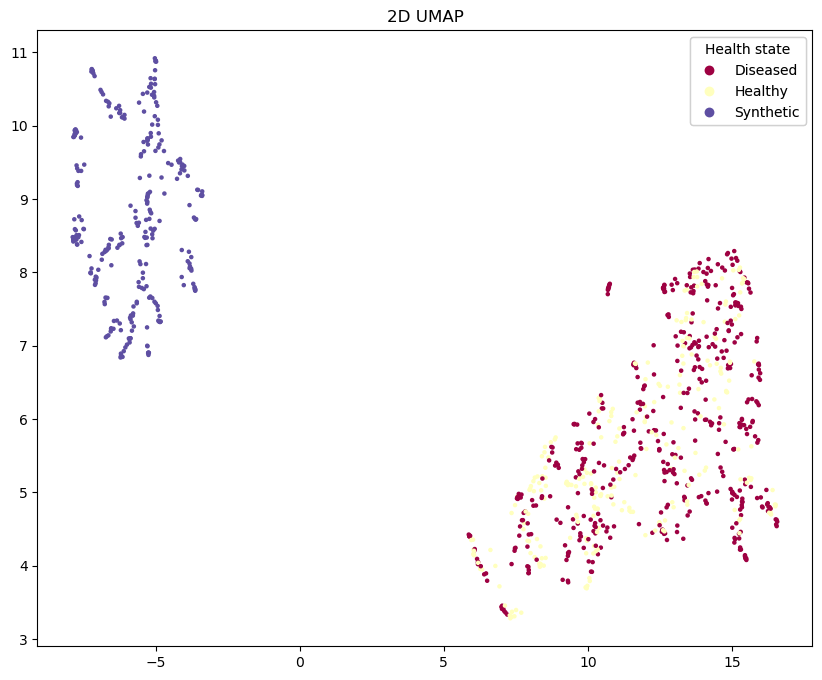

In [19]:
synthetic_data_df = pd.DataFrame(synthetic_data, columns=columns)
synthetic_data_df['Health state'] = 'Synthetic'

frames = [df[synthetic_data_df.columns], synthetic_data_df]
combined_df = pd.concat(frames)

plot_2d_umap(combined_df, 'Health state')

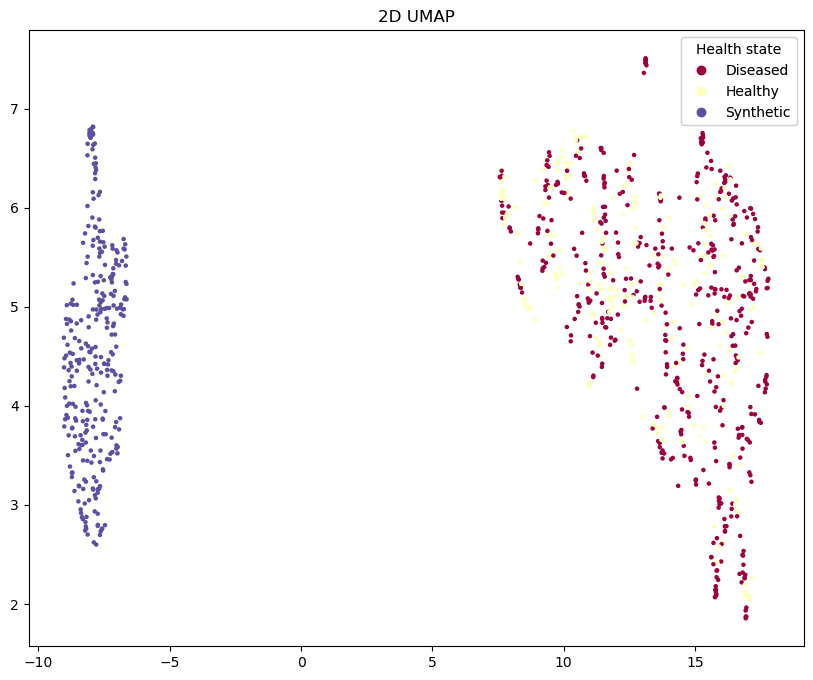

In [10]:
# Noisy
synthetic_data_df = pd.DataFrame(synthetic_data, columns=columns)
synthetic_data_df['Health state'] = 'Synthetic'

frames = [df[synthetic_data_df.columns], synthetic_data_df]
combined_df = pd.concat(frames)

plot_2d_umap(combined_df, 'Health state')